[Benjamin Lau](https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-regularized-logistic-regression-lasso-regression-721f311130fb)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/ex2data2.txt", header=None)
print(df.describe())
df.head()

                0           1           2
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646562    1.000000
max      1.070900    1.108900    1.000000


,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


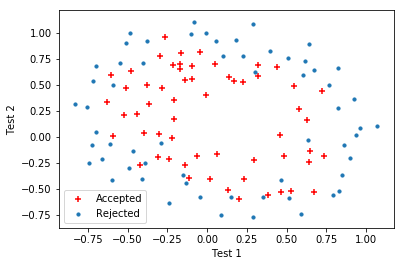

In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)

plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

In [0]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out
X = mapFeature(X[:,0], X[:,1],6)

In [0]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """
    
    m=len(y)
    y=y[:,np.newaxis]
    #print(X,X.shape)
    #print(theta,theta.shape)
    #print("(X @ theta).shape-> ",(X @ theta).shape)
    predictions = sigmoid(X @ theta)
    #print("Prediction-> ",predictions.shape,predictions)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    #print(error)
    cost = 1/m * sum(error)
    #print(cost)
    regCost= cost + Lambda/(2*m) * sum(theta**2)
    #print(regCost.shape,regCost)
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

In [7]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambda to 1
Lambda = 1
#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)
print("Cost at initial theta (zeros):",cost)
#print(grad)
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0
p=classifierPredict(initial_theta,X)
print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Cost at initial theta (zeros): 0.6931471805599461
Train Accuracy: 50.847457627118644 %


In [0]:
# import scipy.optimize as opt
# result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=gradientDescent, args=(X, y,Lambda))
# result
#costFunctionReg(result[0], X, y,Lambda)

In [9]:
def gradientDescent(theta,X,y,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    alpha,num_iters = 0.01,10000
    m=len(y)
    J_history =[]
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    return theta , J_history
theta , J_history = gradientDescent(initial_theta,X,y,1)
print("The regularized theta using ridge regression:\n",theta)
print("min Cost--> ",J_history.index(min(J_history)),min(J_history))
print("max Cost--> ",J_history.index(max(J_history)),max(J_history))

The regularized theta using ridge regression:
 [[ 1.01751236e+00]
 [ 4.43195884e-01]
 [ 9.52036236e-01]
 [-1.62491923e+00]
 [-6.21366553e-01]
 [-9.94547287e-01]
 [ 3.25486613e-02]
 [-2.67509056e-01]
 [-2.67171844e-01]
 [-1.91241027e-01]
 [-1.21974336e+00]
 [-5.88885147e-02]
 [-4.74324697e-01]
 [-1.75802478e-01]
 [-9.82886112e-01]
 [-2.46886003e-01]
 [-1.65203476e-01]
 [-5.96279358e-02]
 [-2.08232656e-01]
 [-2.04751951e-01]
 [-4.96074259e-01]
 [-8.91622482e-01]
 [ 2.93091879e-04]
 [-2.33670040e-01]
 [ 4.37328790e-05]
 [-2.56047034e-01]
 [-8.56889956e-02]
 [-8.67719051e-01]]
min Cost-->  9999 0.5388154553608921
max Cost-->  0 0.6931471805599461


In [0]:
# import scipy.optimize as opt
# result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=gradientDescent, args=(X, y,Lambda))
# costFunctionReg(result[0], X, y,Lambda)

In [0]:
#X.transpose().shape

In [0]:
# predictions = sigmoid(X @ initial_theta)
# zz = predictions - y[:,np.newaxis]
# zz.shape

In [0]:
# zzz = (Lambda/len(y))* initial_theta[1:]
# zzz.shape

In [0]:
# zzzz = X.transpose() @ zz
# zzzz[1:].shape

In [0]:
#1/len(y) * (zzz + zzzz[1:])

In [0]:
#1/len(y) * (X.transpose() @ (sigmoid(X @ initial_theta) - y[:,np.newaxis]))[1:] + (Lambda/len(y))* initial_theta[1:]

In [0]:
# j_0_= 1/len(y) * (X.transpose() @ (sigmoid(X @ initial_theta) - y[:,np.newaxis]))[0]
# j_1_ = 1/len(y) * (X.transpose() @ (sigmoid(X @ initial_theta) - y[:,np.newaxis]))[1:] + (Lambda/len(y))* initial_theta[1:]
# print(j_0_[:,np.newaxis].shape,j_0_[:,np.newaxis])
# print(j_1_.shape,j_1_)
# grad= np.vstack((j_0_[:,np.newaxis],j_1_))
# print(grad.shape)
# grad

(28, 1)


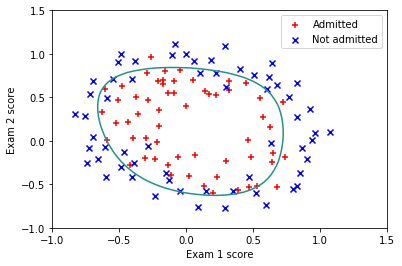

In [18]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
            #print(out.shape)
    return out
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
print(theta.shape)
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [19]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0
p=classifierPredict(theta,X)
print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Train Accuracy: 83.05084745762711 %


In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty="elasticnet",solver='saga',l1_ratio=0)
clf.fit(X,y)
thetaLasso=clf.coef_
print("The regularized theta using lasso regression:\n",thetaLasso.reshape(28,1))
p_=classifierPredict(thetaLasso.reshape(28,1),X)
print("lasso Train Accuracy:", (sum(p_==y[:,np.newaxis])/len(y) *100)[0],"%")

The regularized theta using lasso regression:
 [[ 0.00519278]
 [ 0.62517395]
 [ 1.18102853]
 [-2.01942818]
 [-0.91738695]
 [-1.43106007]
 [ 0.1240259 ]
 [-0.36556492]
 [-0.35721254]
 [-0.17512811]
 [-1.45808783]
 [-0.05096968]
 [-0.61556535]
 [-0.27466979]
 [-1.19275842]
 [-0.24219648]
 [-0.20601899]
 [-0.0447374 ]
 [-0.27780556]
 [-0.2953543 ]
 [-0.45642558]
 [-1.04322428]
 [ 0.02778238]
 [-0.29245578]
 [ 0.01557692]
 [-0.32740885]
 [-0.14385549]
 [-0.9247315 ]]
lasso Train Accuracy: 54.23728813559322 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(28, 1)


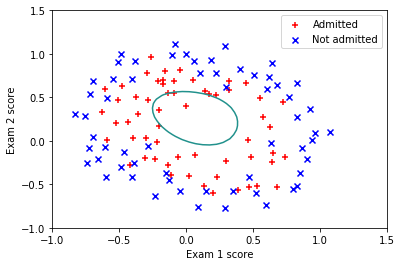

In [21]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
            #print(out.shape)
    return out
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
print(theta.shape)
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ thetaLasso.reshape(28,1)
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty="elasticnet",solver='saga',l1_ratio=1)
clf.fit(X,y)
thetaEN=clf.coef_
print("The regularized theta using lasso regression:\n",thetaLasso.reshape(28,1))
p_=classifierPredict(thetaEN.reshape(28,1),X)
print("lasso Train Accuracy:", (sum(p_==y[:,np.newaxis])/len(y) *100)[0],"%")

The regularized theta using lasso regression:
 [[ 0.00519278]
 [ 0.62517395]
 [ 1.18102853]
 [-2.01942818]
 [-0.91738695]
 [-1.43106007]
 [ 0.1240259 ]
 [-0.36556492]
 [-0.35721254]
 [-0.17512811]
 [-1.45808783]
 [-0.05096968]
 [-0.61556535]
 [-0.27466979]
 [-1.19275842]
 [-0.24219648]
 [-0.20601899]
 [-0.0447374 ]
 [-0.27780556]
 [-0.2953543 ]
 [-0.45642558]
 [-1.04322428]
 [ 0.02778238]
 [-0.29245578]
 [ 0.01557692]
 [-0.32740885]
 [-0.14385549]
 [-0.9247315 ]]
lasso Train Accuracy: 50.847457627118644 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(28, 1)


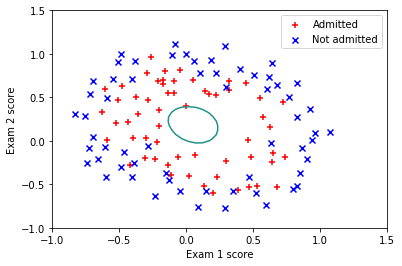

In [23]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
print(theta.shape)
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ thetaEN.reshape(28,1)
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)